In [18]:
# added necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [19]:
df= pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# normalized amount column because it have large values.
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [21]:
#dropped time column because we dont need it , that doesnt have any affect on our model
df= df.drop("Time",axis=1)

In [22]:
y= df["Class"]
x= df.drop(["Class"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=18)

In [23]:
# XGBoost model creation
model = xgb.XGBClassifier(
    objective="binary:logistic", 
    eval_metric="auc",  
    random_state=18
)

# Model training
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=18, ...)

In [24]:
model.score(x_test,y_test)

0.9993914071369217

In [25]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Prediction

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1] 

# Precision, Recall, F1-Score
print("🔹 Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)
print(f"🔹 AUC-ROC Score: {auc_roc:.4f}")


🔹 Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     85299
           1     0.9035    0.7153    0.7984       144

    accuracy                         0.9994     85443
   macro avg     0.9515    0.8576    0.8991     85443
weighted avg     0.9994    0.9994    0.9994     85443

🔹 AUC-ROC Score: 0.9670


In [26]:
#each of pca column's mean calculated.
mean_comparison = df.groupby("Class").mean()
print(mean_comparison)

             V1        V2        V3        V4        V5        V6        V7  \
Class                                                                         
0      0.008258 -0.006271  0.012171 -0.007860  0.005453  0.002419  0.009637   
1     -4.771948  3.623778 -7.033281  4.542029 -3.151225 -1.397737 -5.568731   

             V8        V9       V10  ...       V20       V21       V22  \
Class                                ...                                 
0     -0.000987  0.004467  0.009824  ... -0.000644 -0.001235 -0.000024   
1      0.570636 -2.581123 -5.676883  ...  0.372319  0.713588  0.014049   

            V23       V24       V25       V26       V27       V28    Amount  
Class                                                                        
0      0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131  0.003437  
1     -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667  0.004757  

[2 rows x 29 columns]


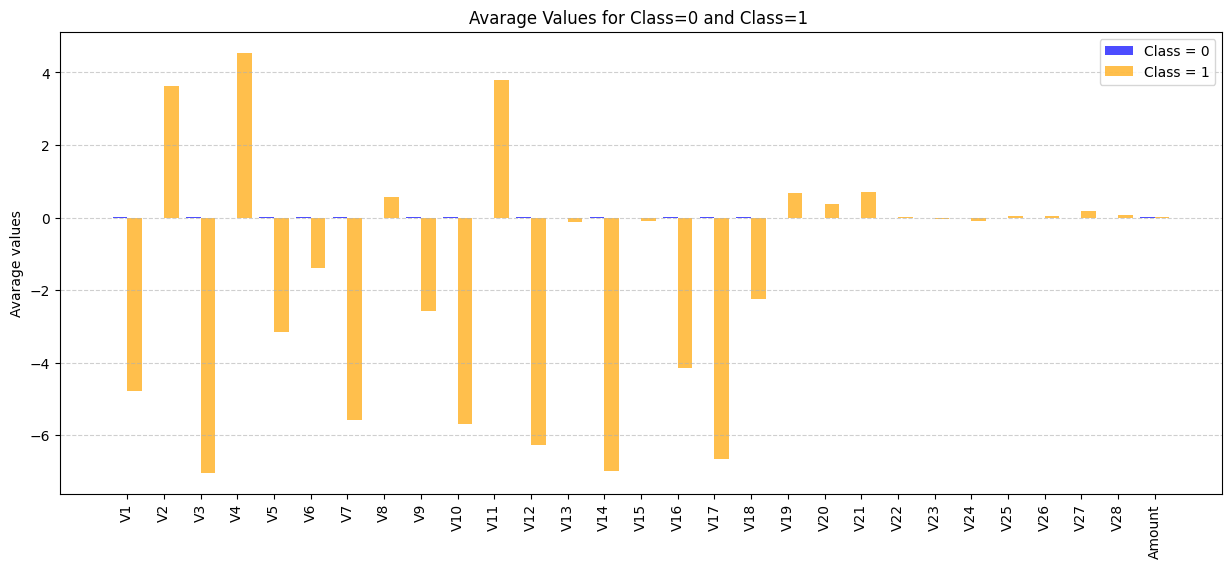

In [27]:
#its displayed on bar graphic
columns = mean_comparison.columns

class_0_means = mean_comparison.loc[0]
class_1_means = mean_comparison.loc[1]

bar_width = 0.4

x_indexes = np.arange(len(columns))

plt.figure(figsize=(15, 6))
plt.bar(x_indexes - bar_width/2, class_0_means, bar_width, label="Class = 0", color="blue", alpha=0.7)
plt.bar(x_indexes + bar_width/2, class_1_means, bar_width, label="Class = 1", color="orange", alpha=0.7)

plt.xticks(ticks=x_indexes, labels=columns, rotation=90)

plt.ylabel("Avarage values")
plt.title("Avarage Values for Class=0 and Class=1 ")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

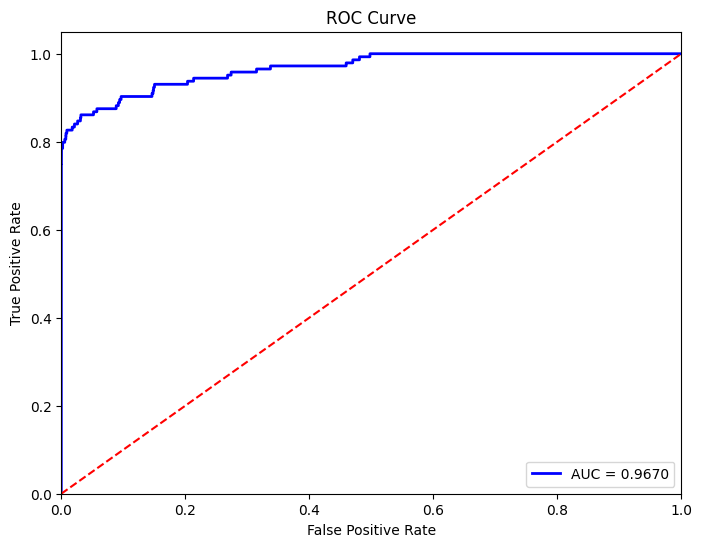

In [28]:
# plotting ROC curve it means that our model can select properly one and zeros.
#calculated false positive and true positive values.
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
